## Постановка задачи

1. Отфильтровать json, где есть ЗП и навыки
https://www.kaggle.com/datasets/sameelie/resume-hh
https://www.kaggle.com/datasets/vyacheslavpanteleev1/hhru-it-vacancies-from-20211025-to-20211202

2. Составить матрицу с коэффициентами
Сумма навыков - y,
Стоимость навыков - вектор х, и сумма - число

найти такие х, чтобы сумма = y

найти мнк.

Есть 3 вакансии

Вакансия 1 - word, excel ,power point - 100 000р
Вакансия 2 -word, комм - 150 000
Вакансия 3 - word, excel, visio - 200 000


x1 + x2 + x3 = 100 000
x1 + x4 = 150 000
x1 + x2 + x5 = 200 000

In [ ]:
import numpy as np

# Матрица коэффициентов
A = np.array([
    [1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 1, 0, 0, 1]
])

# Вектор правой части
b = np.array([100000, 150000, 200000])

# Вычисляем псевдообратную матрицу A^+
A_pseudo_inverse = np.linalg.pinv(A)

# Находим решение минимальной нормы
x = A_pseudo_inverse @ b

print("Решение минимальной нормы:")
for i, xi in enumerate(x, start=1):
    print(f"x{i} = {xi:.2f}")


Решение минимальной нормы:
x1 = 93750.00
x2 = 37500.00
x3 = -31250.00
x4 = 56250.00
x5 = 68750.00


In [ ]:
import numpy as np
from scipy.optimize import nnls

# Матрица коэффициентов A
A = np.array([
    [1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 1, 0, 0, 1]
])

# Вектор правой части b
b = np.array([100000, 150000, 200000])

# Решение задачи неотрицательных наименьших квадратов
x, rnorm = nnls(A, b)

# Вывод решения
print("Решение с ограничением x_i >= 0:")
for i, xi in enumerate(x, start=1):
    print(f"x{i} = {xi:.2f}")


Решение с ограничением x_i >= 0:
x1 = 100000.00
x2 = 0.00
x3 = 0.00
x4 = 50000.00
x5 = 100000.00


## Реализация

In [79]:
!pip install scipy==1.14.0

In [80]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import nnls
from scipy.optimize import lsq_linear

import ast

import torch
import matplotlib.pyplot as plt

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
vacancies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cost_of_skills/IT_vacancies_full.csv')

In [ ]:
vacancies.head()

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,Area,Professional roles,Specializations,Profarea names,Published at
0,49313809,Space307,Golang Developer (Кипр),True,251322.0,NaN,От 3 до 6 лет,Полный день,"['Docker', 'Golang', 'Redis', 'Английский язык...",Мы в Space307 разрабатываем международную торг...,Санкт-Петербург,"['Программист, разработчик']","['Программирование, Разработка']","['Информационные технологии, интернет, телеком']",2021-12-02 12:15:37+03:00
1,48813842,Монополия,Е-mail маркетолог,True,60900.0,NaN,От 1 года до 3 лет,Полный день,"['Грамотность', 'Написание текстов', 'Грамотна...",С 2015 года наш IT блок меняет рынок автотранс...,Санкт-Петербург,['Менеджер по маркетингу и рекламе'],['Маркетинг'],"['Информационные технологии, интернет, телеком']",2021-12-02 10:33:15+03:00
2,49413720,Eden Springs,Оператор call-центра (удаленно),False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"['Клиентоориентированность', 'Ориентация на ре...",Что нужно будет делать: Принимать входящие зв...,Санкт-Петербург,"['Оператор call-центра, специалист контактного...","['Маркетинг', 'Продажи по телефону, Телемаркет...","['Продажи', 'Информационные технологии, интерн...",2021-12-02 10:29:37+03:00
3,46460892,Импорт Хоум,Ведущий SMM специалист,True,60000.0,80000.0,От 1 года до 3 лет,Полный день,"['Продвижение бренда', 'Креативность', 'Adobe ...",В данный момент мы ищем в нашу команду самого ...,Санкт-Петербург,"['SMM-менеджер, контент-менеджер']","['Управление маркетингом', 'PR, Маркетинговые ...","['Информационные технологии, интернет, телеком...",2021-12-01 16:57:02+03:00
4,49555567,Pride Games Studio,UX/UI Designer,False,NaN,NaN,От 1 года до 3 лет,Полный день,"['UI', 'UX', 'gamedev', 'game design', 'проект...",Pride Games Studio — это команда единомышленни...,Санкт-Петербург,"['Дизайнер, художник']","['Игровое ПО', 'Программирование, Разработка',...","['Маркетинг, реклама, PR', 'Информационные тех...",2021-12-01 16:48:24+03:00


In [83]:
# Applying the logic
vacancies['To'] = vacancies.apply(lambda row: row['From'] if pd.isna(row['To']) and not pd.isna(row['From']) and row['To'] != 0 else row['To'], axis=1)
vacancies['From'] = vacancies.apply(lambda row: row['To'] - 10000 if pd.isna(row['From']) and not pd.isna(row['To']) and row['To'] != 0 else row['From'], axis=1)

# Dropping rows where both From and To are NaN
vacancies.dropna(subset=['From', 'To'], how='all', inplace=True)

In [84]:
vacancies = vacancies[vacancies['To'] != 0]

In [ ]:
len(vacancies)

17581

In [85]:
df = vacancies[['Keys', 'To']]

#преобразуем в список
df['Keys'] = df['Keys'].apply(lambda x: ast.literal_eval(x))

<ipython-input-85-0351b16a501f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Keys'] = df['Keys'].apply(lambda x: ast.literal_eval(x))


In [ ]:
df.head()

,Keys,To
0,"['Docker', 'Golang', 'Redis', 'Английский язык...",251322.0
1,"['Грамотность', 'Написание текстов', 'Грамотна...",60900.0
3,"['Продвижение бренда', 'Креативность', 'Adobe ...",80000.0
6,"['Грамотная речь', 'Грамотность', 'Работа с бо...",56550.0
8,"['devops', 'Nagios', 'Nginx', 'PHP', 'Админист...",160000.0


In [ ]:
all_skills = []

# Iterate through each row in the 'Keys' column
for row in vacancies['Keys']:
  actual_list = ast.literal_eval(row)
  # Convert all elements in the list to lowercase
  lowercase_list = [item.lower() for item in actual_list]
  # Add the skills to the all_skills list
  all_skills.extend(lowercase_list)

In [ ]:
# Get unique skills
unique_skills = list(set(all_skills))

In [ ]:
len(unique_skills)

7038

In [ ]:
# Create a dictionary with unique IDs for each skill
skill_id_dict = {skill: index for index, skill in enumerate(unique_skills)}

print(skill_id_dict)

{'sales management': 0, 'сетевая безопасность': 1, 'маржинальный анализ': 2, 'bubble': 3, 'пак "криптопро уц"': 4, 'ремон бытовой техники': 5, 'хранилища данных': 6, 'чтение проектной документации': 7, 'общительность': 8, 'администрирование nix систем': 9, '1с: комплексная автоматизация 8': 10, 'трудолюбие, дисциплина, обязательность, желание работать': 11, 'jtbd': 12, 'монтажник опс': 13, 'gimp': 14, 'arduino': 15, 'retopo': 16, 'wolfram matematica': 17, 'высоконагруженные системы': 18, 'работа с видео хостерами': 19, 'tribon': 20, 'phone calls': 21, 'опыт работы в zabbix; grafana; prometheus': 22, 'sass/scss': 23, 'ms visio (структурные схемы)': 24, 'сетевые протоколы': 25, 'es6+': 26, 'защита информации': 27, 'владение английским языком': 28, 'ремонт квадроцикла': 29, 'soap ui': 30, 'react js': 31, 'microsoft azure': 32, 'quasar': 33, 'способность оказывать влияние': 34, 'корректура текстов': 35, 'mybatis': 36, 'выдача заказов клиентам': 37, 'blender': 38, 'проведение опросов': 39, 

In [ ]:
skill_amount = len(skill_id_dict)
def make_cf(A_cur):
  cf = [0]*skill_amount
  for i in A_cur:
    cf[i] = 1
  return cf

In [ ]:
A = []
b = list(df['To'])

for row in df['Keys']:
  a = []
  for skill in row:
    a.append(skill_id_dict[skill.lower()])
  A.append(make_cf(a))


In [ ]:
b = [i for i in b if i != 0]

In [ ]:
%%time

# Матрица коэффициентов A
A = np.array(A)

# Вектор правой части b
b = np.array(b)
# Решение задачи неотрицательных наименьших квадратов
x, rnorm = nnls(A, b, maxiter=1)

# Вывод решения
print("Решение с ограничением x_i >= 0:")
for i, xi in enumerate(x, start=1):
    print(f"x{i} = {xi:.2f}")

NameError: name 'b' is not defined

### NNLS

In [ ]:
# Преобразование данных в numpy массивы
A = np.array(A)
b = np.array(b)

# Проверка размерностей
assert A.shape[0] == b.shape[0], "Количество строк в A и размерность b должны совпадать."

# Нормализация матрицы A и вектора b
A_norms = np.linalg.norm(A, axis=0)
A_normalized = A / A_norms

b_mean = np.mean(b)
b_std = np.std(b)
b_normalized = (b - b_mean) / b_std

# Задание ограничений: x_i >= 0
bounds = (0, np.inf)

# Настройка параметров алгоритма
options = {'max_iter': 10000, 'tol': 1e-6}

# Решение задачи
res = lsq_linear(A_normalized, b_normalized, bounds=bounds, method='bvls',
                 lsq_solver='exact', verbose=1, **options) #Метод bvls (Bounded Variable Least Squares) может быть более эффективным для задач с ограничениями на переменные. Попробуйте заменить метод trf на bvls.

# Проверка успешности решения
if res.success:
    # Восстановление решения в исходном масштабе
    x = res.x / A_norms * b_std + b_mean
    print("Решение с ограничением x_i >= 0:")
    for i, xi in enumerate(x, start=1):
        print(f"x{i} = {xi:.2f}")
else:
    print("Не удалось найти решение:", res.message)


Выходные данные были обрезаны до нескольких последних строк (5000).
x2039 = 136922.29
x2040 = 136922.29
x2041 = 136922.29
x2042 = 136922.29
x2043 = 136922.29
x2044 = 136922.29
x2045 = 144523.21
x2046 = 136922.29
x2047 = 183461.15
x2048 = 136922.29
x2049 = 136922.29
x2050 = 136922.29
x2051 = 136922.29
x2052 = 150422.38
x2053 = 136922.29
x2054 = 136922.29
x2055 = 136922.29
x2056 = 136922.29
x2057 = 175075.20
x2058 = 136922.29
x2059 = 136922.29
x2060 = 136922.29
x2061 = 136922.29
x2062 = 136922.29
x2063 = 136922.29
x2064 = 136922.29
x2065 = 136922.29
x2066 = 144170.21
x2067 = 136922.29
x2068 = 272399.08
x2069 = 136922.29
x2070 = 136922.29
x2071 = 136922.29
x2072 = 136922.29
x2073 = 136922.29
x2074 = 136922.29
x2075 = 136922.29
x2076 = 136922.29
x2077 = 137757.98
x2078 = 136922.29
x2079 = 136922.29
x2080 = 136922.29
x2081 = 136922.29
x2082 = 136922.29
x2083 = 136922.29
x2084 = 136922.29
x2085 = 136922.29
x2086 = 136922.29
x2087 = 150000.00
x2088 = 136922.29
x2089 = 136922.29
x2090 = 136922

In [ ]:
res

       message: The relative change of the cost function is less than `tol`.
       success: True
        status: 2
           fun: [-2.902e-01  7.807e-01 ...  8.926e-01 -1.675e+00]
             x: [ 1.965e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           nit: 263
          cost: 5949.7406198880335
    optimality: 0.10535369191889658
   active_mask: [ 0.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]
 unbounded_sol: (array([ 2.757e+00, -6.677e-01, ...,  9.736e+14, -2.520e-01]), array([], dtype=float64), 5993, array([ 4.182e+00,  4.022e+00, ...,  2.713e-18,  4.990e-19]))

In [ ]:
# Построение гистограммы распределения значений x

# Настройка размеров графика
plt.figure(figsize=(10, 6))

# Построение гистограммы
plt.hist(x, bins=30, edgecolor='black')

# Добавление заголовка и меток осей
plt.title('Распределение значений x')
plt.xlabel('Значения x')
plt.ylabel('Частота')

# Отображение графика
plt.show()

In [ ]:
coeff = list(x)
with open('/content/drive/MyDrive/Colab Notebooks/cost_of_skills/lsq_linear.txt', 'w') as file:
    for item in coeff:
        file.write(f"{item}\n")

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/cost_of_skills/lsq_linear.txt', 'r') as file:
    lines = file.readlines()
    lines = [float(line.strip()) for line in lines]

In [ ]:
A*np.array(lines)-b

In [ ]:
np.abs(A@np.array(lines)-b).mean()

705299.114082123

In [ ]:
np.abs(A@np.array(lines)-b).std()

602478.1168771336

### PyTorch реализация

In [86]:
# Проверка наличия GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Реализация с оптимизацией

# Проверка наличия GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Матрица коэффициентов A и вектор b
# A = torch.tensor([
#     [1, 1, 1, 0, 0],
#     [1, 0, 0, 1, 0],
#     [1, 1, 0, 0, 1]
# ], dtype=torch.float32, device=device)

# b = torch.tensor([100000, 150000, 200000], dtype=torch.float32, device=device)


A = torch.tensor(A, dtype=torch.float32, device=device)
b = torch.tensor(b, dtype=torch.float32, device=device)

# Инициализация переменных x с положительными значениями
x = torch.nn.Parameter(torch.full((7038,), 50000.0, device=device)) #x-количество навыков

# Параметры для штрафа
penalty_weight = 1  # Коэффициент штрафа (можно настроить)
threshold = 50000.0   # Пороговое значение для штрафа

# Оптимизатор
optimizer = torch.optim.Adam([x], lr=1)

# Планировщик обучения для уменьшения скорости обучения на плато
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=1000, verbose=True # patience=1000 означает, что если потери не улучшаются в течение 1000 итераций, скорость обучения будет уменьшена.
)

# Цикл оптимизации
num_iterations = 1000000
for iteration in range(num_iterations):
    optimizer.zero_grad()

    # Вычисление невязки системы уравнений
    residual = (torch.matmul(A, x) - b).abs()
    loss_equations = torch.mean(residual)

    # Штраф для x_i < 10,000
    penalty = penalty_weight * torch.mean((torch.relu(residual - threshold)))

    # Общая функция потерь
    loss = loss_equations + penalty

    # Обратное распространение ошибки
    loss.backward()
    optimizer.step()

    # Принудительное ограничение x_i >= 0
    with torch.no_grad():
        x.clamp_(min=0)

    # Обновление планировщика
    scheduler.step(loss)

    # Периодический вывод информации
    if (iteration + 1) % 500 == 0:
        print(f"Итерация {iteration + 1}, Потери: {loss.item():.2f}, Penalty: {penalty}, Equations: {loss_equations}")

# Вывод решения
print("\nРешение с штрафом для x_i < 10,000:")
for i, xi in enumerate(x.detach().cpu().numpy(), start=1):
    print(f"x{i} = {xi:.2f}")


<ipython-input-78-c54f7ecfb823>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A, dtype=torch.float32, device=device)
<ipython-input-78-c54f7ecfb823>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b, dtype=torch.float32, device=device)


Итерация 500, Потери: 351543.12, Penalty: 152603.40625, Equations: 198939.703125
Итерация 1000, Потери: 346946.50, Penalty: 150332.25, Equations: 196614.265625
Итерация 1500, Потери: 342357.88, Penalty: 148065.421875, Equations: 194292.46875
Итерация 2000, Потери: 337781.38, Penalty: 145804.46875, Equations: 191976.890625
Итерация 2500, Потери: 333220.69, Penalty: 143550.46875, Equations: 189670.234375
Итерация 3000, Потери: 328668.88, Penalty: 141302.890625, Equations: 187365.96875
Итерация 3500, Потери: 324124.88, Penalty: 139058.9375, Equations: 185065.9375


KeyboardInterrupt: 

lr, penalty_weight, отключение (penalty, loss_equations)
Больше итераций

optuna попробовать

#### Оценка

In [ ]:
coeff = list(x)
with open('/content/drive/MyDrive/Colab Notebooks/cost_of_skills/pytorch_1000000.txt', 'w') as file:
    for item in coeff:
        file.write(f"{item}\n")

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/cost_of_skills/pytorch_500000.txt', 'r') as file:
    lines = file.readlines()
    lines = [float(line.strip()) for line in lines]

In [ ]:
#500000
A = torch.tensor(A, dtype=torch.float32, device=device).cpu()
b = torch.tensor(b, dtype=torch.float32, device=device).cpu()
np.abs(A@np.array(lines)-b).mean()

<ipython-input-45-10bf9f0834b9>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A, dtype=torch.float32, device=device).cpu()
<ipython-input-45-10bf9f0834b9>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b, dtype=torch.float32, device=device).cpu()


tensor(103078.3271, dtype=torch.float64)

In [ ]:
np.abs(A@np.array(lines)-b).std()

tensor(93244.7274, dtype=torch.float64)

In [ ]:
#1000000
A = torch.tensor(A, dtype=torch.float32, device=device).cpu()
b = torch.tensor(b, dtype=torch.float32, device=device).cpu()
np.abs(A@np.array(lines)-b).mean()

<ipython-input-26-ca432f9b718d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A, dtype=torch.float32, device=device).cpu()
<ipython-input-26-ca432f9b718d>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b, dtype=torch.float32, device=device).cpu()


tensor(69742.5973, dtype=torch.float64)

In [ ]:
len(A@np.array(lines))

17582

In [ ]:
len(b), len(A)

(17582, 17582)

In [ ]:
N = (torch.matmul(torch.tensor(A).float(), torch.tensor(np.array(lines)).float()) - b).abs() / b

TypeError: unsupported operand type(s) for -: 'Tensor' and 'list'

In [ ]:
N

tensor([0.8011, 0.6014, 2.2281,  ..., 2.8465, 0.3465, 0.5669],
       dtype=torch.float64)

In [ ]:
for i in b:
  if i == 0:
    print(i)

In [ ]:
((torch.matmul(torch.tensor(A).float(), torch.tensor(np.array(lines)).float()) - b).abs() / b).mean()

TypeError: unsupported operand type(s) for -: 'Tensor' and 'list'

#### Pytorch

In [87]:
import torch
import pandas as pd
from tqdm import tqdm

vac_df = df.rename(columns={'Keys': 'Skills', 'To': 'Salary'})

# vac_df = pd.DataFrame(data)

# Create a list of unique skills from the dataframe
unique_skills = set()
for skills in vac_df['Skills']:
    unique_skills.update(skills)
unique_skills = sorted(list(unique_skills))

# Map each skill to an index
skill_to_index = {skill: idx for idx, skill in enumerate(unique_skills)}
num_skills = len(unique_skills)

# Initialize skill values x0 to xN with random positive values
x = torch.nn.Parameter(torch.rand(num_skills) * 100000, requires_grad=True)

# Define the optimizer
optimizer = torch.optim.Adam([x], lr=1)

# Number of epochs
num_epochs = 100

# Optimization loop with progress bar
print("Starting optimization...")
with tqdm(total=num_epochs) as pbar:
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        # Ensure x_i >= 0 by clamping
        x_clamped = torch.clamp(x, min=0)
        # Compute residuals for each vacancy
        residuals = []
        for idx, row in vac_df.iterrows():
            skills = row['Skills']
            salary = row['Salary']
            skills_indices = [skill_to_index[skill] for skill in skills]
            skills_sum = torch.sum(x_clamped[skills_indices])
            residual = skills_sum - salary
            residuals.append(residual)
        # Stack residuals into a tensor
        residuals = torch.stack(residuals)
        # Define the loss function as the sum of squared residuals
        loss = torch.sum(residuals ** 2)
        # Backpropagation
        loss.backward()
        # Update parameters
        optimizer.step()
        # Re-apply the non-negativity constraint
        with torch.no_grad():
            x.clamp_(min=0)
        # Update the progress bar
        pbar.update(1)
        # Optionally, you can set the description to show the loss
        if epoch % 1000 == 0:
            pbar.set_description(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Output the optimized skill values
print("\nOptimized skill values (x_i):")
for skill, idx in skill_to_index.items():
    xi = x_clamped[idx].item()
    print(f"{skill}: {xi:.2f}")

# Compute residuals again with the optimized variables and collect actual salaries
with torch.no_grad():
    residuals = []
    actual_salaries = []
    for idx, row in vac_df.iterrows():
        skills = row['Skills']
        salary = row['Salary']
        skills_indices = [skill_to_index[skill] for skill in skills]
        skills_sum = torch.sum(x_clamped[skills_indices])
        residual = skills_sum - salary
        residuals.append(residual)
        actual_salaries.append(salary)
    residuals = torch.stack(residuals)
    actual_salaries = torch.tensor(actual_salaries, dtype=torch.float32)

# Calculate metrics
MAE = torch.mean(torch.abs(residuals)).item()
VAR = torch.std(residuals).item()
MAPE = torch.mean(torch.abs(residuals) / actual_salaries).item() * 100  # Multiply by 100 for percentage

print(f"\nQuality Metrics:")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Standard Deviation (STD): {VAR:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {MAPE:.2f}%")


Starting optimization...


Epoch 0, Loss: 1196717609320448.0000: 100%|██████████| 100/100 [07:18<00:00,  4.39s/it]


Выходные данные были обрезаны до нескольких последних строк (5000).
Struts2: 64180.21
Studio 5000: 93447.48
Styled Components: 37851.75
Styled-components: 13194.34
Stylelint: 52334.56
Stylus: 56460.81
Substance Designer: 70382.54
Substance Painter: 79950.99
Subversion: 82468.19
SuiteCRM: 2738.75
Superset: 79917.29
Supervisor: 60847.63
Supply Chain Management: 53522.61
Support system: 850.53
Svelte: 88147.05
Svelte.js: 55456.31
Swagger: 54507.78
Swap: 37046.59
Swapper: 1384.08
Swift: 14938.74
Swift 5: 20586.11
SwiftUI: 71780.59
Swing: 74441.92
Swinject: 74288.09
Switch: 60758.61
Symantec Antivirus: 97207.59
Symfony: 35368.88
Symphony: 75835.55
System Administrator: 49845.79
System Analysis: 943.09
System Integration: 39865.21
System Verilog: 39566.00
SystemVerilog: 66416.56
Systemd: 67542.90
T-SQL: 92693.16
TAM: 41731.89
TBS: 88163.79
TCP: 61368.75
TCP/IP: 17160.36
TCP/IP, UART, SPI: 84863.48
TDD: 66410.83
TFS: 3718.09
TI OMAP: 65759.63
TIA Portal: 71244.76
TLS: 14810.31
TMS Systems: 20

In [ ]:
86972

#### Pytorch with Optuna

In [88]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [91]:
import torch
import pandas as pd
from tqdm import tqdm
import optuna

# Ensure that vac_df is defined before running this code
# vac_df should be a DataFrame with 'Skills' and 'Salary' columns
# Example:
# vac_df = pd.DataFrame({
#     'Skills': [['skill1', 'skill2'], ['skill3'], ...],
#     'Salary': [100000, 150000, ...]
# })

def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform('lr', 1e-5, 1e0)  # Learning rate between 1e-5 and 1
    num_epochs = trial.suggest_int('num_epochs', 100, 1000)  # Number of epochs between 100 and 1000
    penalty = trial.suggest_loguniform('penalty', 1e-5, 1e2)  # Regularization parameter between 1e-5 and 100

    # Create a list of unique skills from the dataframe
    unique_skills = set()
    for skills in vac_df['Skills']:
        unique_skills.update(skills)
    unique_skills = sorted(list(unique_skills))

    # Map each skill to an index
    skill_to_index = {skill: idx for idx, skill in enumerate(unique_skills)}
    num_skills = len(unique_skills)

    # Initialize skill values x0 to xN with random positive values
    x = torch.nn.Parameter(torch.rand(num_skills) * 100000, requires_grad=True)

    # Define the optimizer
    optimizer = torch.optim.Adam([x], lr=lr)

    # Optimization loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        # Ensure x_i >= 0 by clamping
        x_clamped = torch.clamp(x, min=0)
        # Compute residuals for each vacancy
        residuals = []
        for idx, row in vac_df.iterrows():
            skills = row['Skills']
            salary = row['Salary']
            skills_indices = [skill_to_index.get(skill) for skill in skills if skill in skill_to_index]
            skills_indices = [idx for idx in skills_indices if idx is not None]
            if not skills_indices:
                continue  # Skip if no valid skills
            skills_sum = torch.sum(x_clamped[skills_indices])
            residual = skills_sum - salary
            residuals.append(residual)
        # If no residuals, return high MAE
        if not residuals:
            return float('inf')
        # Stack residuals into a tensor
        residuals = torch.stack(residuals)
        # Define the loss function as the sum of squared residuals plus penalty
        loss = torch.sum(residuals ** 2)
        # Add L2 penalty (regularization)
        loss += penalty * torch.sum(x_clamped ** 2)
        # Backpropagation
        loss.backward()
        # Update parameters
        optimizer.step()
        # Re-apply the non-negativity constraint
        with torch.no_grad():
            x.clamp_(min=0)
    # Compute residuals again with the optimized variables and collect actual salaries
    with torch.no_grad():
        residuals = []
        for idx, row in vac_df.iterrows():
            skills = row['Skills']
            salary = row['Salary']
            skills_indices = [skill_to_index.get(skill) for skill in skills if skill in skill_to_index]
            skills_indices = [idx for idx in skills_indices if idx is not None]
            if not skills_indices:
                continue
            skills_sum = torch.sum(x_clamped[skills_indices])
            residual = skills_sum - salary
            residuals.append(residual)
        if not residuals:
            return float('inf')
        residuals = torch.stack(residuals)
    # Calculate MAE
    MAE = torch.mean(torch.abs(residuals)).item()
    return MAE

# Define the number of trials
n_trials = 50

# Create a progress bar
pbar = tqdm(total=n_trials, desc="Optuna Trials")

# Define a callback to update the progress bar after each trial
def tqdm_callback(study, trial):
    pbar.update(1)
    # Optionally, update the progress bar description with current best value
    pbar.set_postfix({'Best MAE': f'{study.best_value:.2f}'})

# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=n_trials, callbacks=[tqdm_callback])

# Close the progress bar
pbar.close()

# Print best hyperparameters
print('\nBest hyperparameters:', study.best_params)
print(f'Best MAE: {study.best_value:.2f}')

# After finding the best hyperparameters, retrain the model using them to get the optimized skill values

# Retrieve the best hyperparameters
best_lr = study.best_params['lr']
best_num_epochs = study.best_params['num_epochs']
best_penalty = study.best_params['penalty']

# Re-initialize skill values x0 to xN with random positive values
x = torch.nn.Parameter(torch.rand(num_skills) * 100000, requires_grad=True)

# Define the optimizer with the best learning rate
optimizer = torch.optim.Adam([x], lr=best_lr)

# Training loop with the best number of epochs
print("\nTraining the final model with the best hyperparameters...")
for epoch in range(best_num_epochs):
    optimizer.zero_grad()
    # Ensure x_i >= 0 by clamping
    x_clamped = torch.clamp(x, min=0)
    # Compute residuals for each vacancy
    residuals = []
    for idx, row in vac_df.iterrows():
        skills = row['Skills']
        salary = row['Salary']
        skills_indices = [skill_to_index.get(skill) for skill in skills if skill in skill_to_index]
        skills_indices = [idx for idx in skills_indices if idx is not None]
        if not skills_indices:
            continue
        skills_sum = torch.sum(x_clamped[skills_indices])
        residual = skills_sum - salary
        residuals.append(residual)
    if not residuals:
        break
    residuals = torch.stack(residuals)
    # Define the loss function as the sum of squared residuals plus penalty
    loss = torch.sum(residuals ** 2)
    # Add L2 penalty (regularization)
    loss += best_penalty * torch.sum(x_clamped ** 2)
    # Backpropagation
    loss.backward()
    # Update parameters
    optimizer.step()
    # Re-apply the non-negativity constraint
    with torch.no_grad():
        x.clamp_(min=0)

# Output the optimized skill values
print("\nOptimized skill values (x_i):")
for skill, idx in skill_to_index.items():
    xi = x_clamped[idx].item()
    print(f"{skill}: {xi:.2f}")

# Compute residuals again with the optimized variables
with torch.no_grad():
    residuals = []
    actual_salaries = []
    for idx, row in vac_df.iterrows():
        skills = row['Skills']
        salary = row['Salary']
        skills_indices = [skill_to_index.get(skill) for skill in skills if skill in skill_to_index]
        skills_indices = [idx for idx in skills_indices if idx is not None]
        if not skills_indices:
            continue
        skills_sum = torch.sum(x_clamped[skills_indices])
        residual = skills_sum - salary
        residuals.append(residual)
        actual_salaries.append(salary)
    residuals = torch.stack(residuals)
    actual_salaries = torch.tensor(actual_salaries, dtype=torch.float32)

# Calculate final metrics
MAE = torch.mean(torch.abs(residuals)).item()
STD = torch.std(residuals).item()
MAPE = torch.mean(torch.abs(residuals) / actual_salaries).item() * 100  # Multiply by 100 for percentage

print(f"\nFinal Quality Metrics:")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Standard Deviation (STD): {STD:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {MAPE:.2f}%")



Optuna Trials:   0%|          | 0/50 [00:00<?, ?it/s][I 2024-11-09 17:23:09,345] A new study created in memory with name: no-name-929016c5-2855-4bc9-a689-2c75984ac18f
<ipython-input-91-8b800698c56c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e0)  # Learning rate between 1e-5 and 1
<ipython-input-91-8b800698c56c>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  penalty = trial.suggest_loguniform('penalty', 1e-5, 1e2)  # Regularization parameter between 1e-5 and 100
Optuna Trials:   0%|          | 0/50 [00:22<?, ?it/s]
[W 2024-11-09 17:24:04,272] Trial 0 failed with parameters: {'lr': 0.0006134042255801966, 'num_epochs':

KeyboardInterrupt: 

1. NNLS досчитать, проверить, что не использует градиентные методы оптимизации  (досчитать не получилось использовали lsq_linear)  
MAE = 700000
2. Запустить PyTorch реализацию  
MAE = 200000
3. Сравнить ответы
4. Посторить гистограммы с распределнием стоимостей

500000 опреаций, добавить планировщик reduce on platau,

MAE = 69826.9179

### Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error,  mean_absolute_percentage_error


In [ ]:
data = df.copy()

In [ ]:
data.head()

,Keys,To
0,"[Docker, Golang, Redis, Английский язык, Kafka]",251322.0
1,"[Грамотность, Написание текстов, Грамотная реч...",60900.0
3,"[Продвижение бренда, Креативность, Adobe Photo...",80000.0
6,"[Грамотная речь, Грамотность, Работа с большим...",56550.0
8,"[devops, Nagios, Nginx, PHP, Администрирование...",160000.0


In [ ]:
# Выделение признаков и целевой переменной

X = data[['Keys']]  # DataFrame с одним столбцом 'skills', содержащим списки навыков
y = data['To']

# Создание объектов Pool, указывая, что 'skills' — это категориальный признак
train_pool = Pool(
    data=X,
    label=y,
    cat_features=['Keys']  # Указываем название столбца с категориальными признаками
)

# Инициализация и обучение модели CatBoostRegressor с функцией потерь MAE
model = CatBoostRegressor(
    loss_function='MAE',
    verbose=True  # Отключаем вывод во время обучения для компактности
)

model.fit(train_pool)

# Предсказание на тестовой выборке
y_pred = model.predict(X)

# Вычисление среднего абсолютного отклонения (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Среднее абсолютное отклонение (MAE) на тестовой выборке: {mae}')


TypeError: must be real number, not list

In [ ]:
mean_absolute_percentage_error(y, y_pred)

2.0491138116439616e+16

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error

# Генерируем синтетические данные
np.random.seed(42)
data_size = 1000000

# Список возможных навыков
skills_list = ['навык' + str(i) for i in range(1, 51)]  # навыки от 'навык1' до 'навык10'

# Создаем DataFrame с переменным количеством навыков
data = pd.DataFrame({
    'skills': [np.random.choice(skills_list, size=np.random.randint(1, 50), replace=False).tolist() for _ in range(data_size)],
    'cost': np.random.randint(500, 2000, size=data_size)
})

# Преобразуем столбец 'skills' в строковый формат, разделяя навыки запятой
data['skills'] = data['skills'].apply(lambda x: ','.join(x)) # Convert list of skills to a comma-separated string


# Преобразуем столбец 'skills' в необходимый формат
X_train = data[['skills']]
y_train = data['cost']

# Создаем Pool для CatBoost
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=['skills']
)

# Инициализируем модель без регуляризации
model = CatBoostRegressor(
    loss_function='MAE',
    iterations=100,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

# Обучаем модель
model.fit(train_pool)

# Получаем итоговое значение функции потерь из модели
final_loss = model.get_best_score()['learn']['MAE']
print(f"Итоговое значение функции потерь (CatBoost): {final_loss}")

# Предсказываем значения на обучающем наборе
y_pred = model.predict(X_train)

# Вычисляем MAE с помощью sklearn
mae_sklearn = mean_absolute_error(y_train, y_pred)
print(f"MAE, вычисленное с помощью sklearn: {mae_sklearn}")


Итоговое значение функции потерь (CatBoost): 375.09355406409907
MAE, вычисленное с помощью sklearn: 361.4802745127561


In [ ]:
data['skills'][0]

'навык44,навык41,навык47,навык13,навык25,навык32,навык18,навык33,навык4,навык31,навык14,навык9,навык50,навык7,навык48,навык5,навык37,навык34,навык20,навык49,навык16,навык10,навык17,навык27,навык45,навык26,навык12,навык1,навык46,навык28,навык35,навык6,навык30,навык38,навык2,навык22,навык3,навык40,навык36'

In [ ]:
df['Keys'][0]

"['Docker', 'Golang', 'Redis', 'Английский язык', 'Kafka']"

In [ ]:
ast.literal_eval(df['Keys'][0])

['Docker', 'Golang', 'Redis', 'Английский язык', 'Kafka']

In [ ]:
', '.join(ast.literal_eval(df['Keys'][0]))

'Docker, Golang, Redis, Английский язык, Kafka'

In [ ]:
df = df.rename(columns={'Keys': 'skills', 'To': 'cost'})

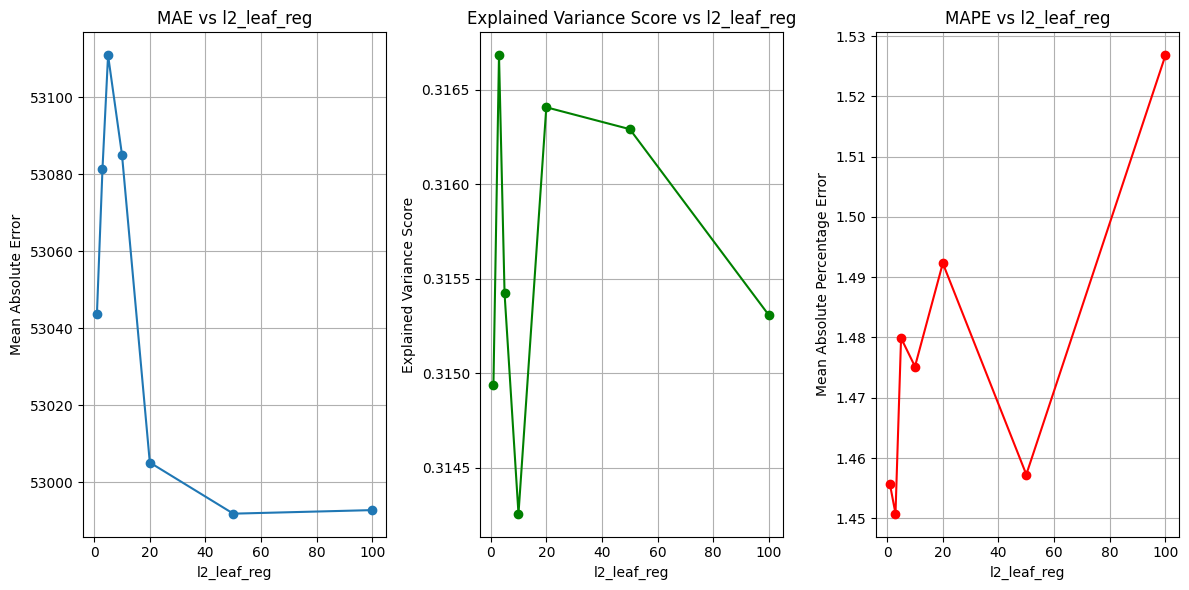

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Sample data preparation
# Replace this with your actual data loading mechanism
# data = pd.DataFrame({
#     'skills': [
#         ['skill_a', 'skill_b'],
#         ['skill_b', 'skill_c'],
#         ['skill_a', 'skill_c'],
#         ['skill_a', 'skill_b', 'skill_c'],
#         ['skill_d'],
#         ['skill_e', 'skill_f'],
#         ['skill_f', 'skill_g'],
#         ['skill_e', 'skill_g'],
#         ['skill_d', 'skill_e', 'skill_f']
#     ],
#     'cost': [250, 350, 300, 450, 150, 400, 370, 330, 500]
# })

data = df.copy()

# Preprocess the data to handle multiple skills per entry
max_skills = data['skills'].apply(len).max()
for i in range(max_skills):
    data[f'skill_{i}'] = data['skills'].apply(lambda x: x[i] if len(x) > i else 'missing')

# Define the list of categorical features
categorical_features = [f'skill_{i}' for i in range(max_skills)]

# Features and target variable
X = data[categorical_features]
y = data['cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize lists to store the evaluation metrics
l2_leaf_reg_values = [1, 3, 5, 10, 20, 50, 100]
mae_list = []
var_list = []
mape_list = []

# Iterate over different values of l2_leaf_reg to assess regularization impact
for l2_reg in l2_leaf_reg_values:
    # Create Pool objects for CatBoost
    train_pool = Pool(X_train, y_train, cat_features=categorical_features)
    test_pool = Pool(X_test, y_test, cat_features=categorical_features)

    # Initialize CatBoostRegressor with varying l2_leaf_reg
    model = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        loss_function='MAE',
        l2_leaf_reg=l2_reg,
        verbose=False
    )

    # Train the model
    model.fit(train_pool)

    # Make predictions on the test set
    y_pred = model.predict(test_pool)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    var = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Store the metrics
    mae_list.append(mae)
    var_list.append(var)
    mape_list.append(mape)

# Visualization of the impact of regularization
plt.figure(figsize=(12, 6))

# Plot MAE
plt.subplot(1, 3, 1)
plt.plot(l2_leaf_reg_values, mae_list, marker='o')
plt.title('MAE vs l2_leaf_reg')
plt.xlabel('l2_leaf_reg')
plt.ylabel('Mean Absolute Error')
plt.grid(True)

# Plot VAR
plt.subplot(1, 3, 2)
plt.plot(l2_leaf_reg_values, var_list, marker='o', color='green')
plt.title('Explained Variance Score vs l2_leaf_reg')
plt.xlabel('l2_leaf_reg')
plt.ylabel('Explained Variance Score')
plt.grid(True)

# Plot MAPE
plt.subplot(1, 3, 3)
plt.plot(l2_leaf_reg_values, mape_list, marker='o', color='red')
plt.title('MAPE vs l2_leaf_reg')
plt.xlabel('l2_leaf_reg')
plt.ylabel('Mean Absolute Percentage Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score (VAR): {var}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 52992.739630059776
Explained Variance Score (VAR): 0.3153062595597693
Mean Absolute Percentage Error (MAPE): 1.526818235577108


Составить сравнительную таблицу с методами
В столбцах разные показатели качества mae, var, mape

Разобраться почему различается loss и mae

Посмотреть влияние регуляризации в catboost

Гипотеза. Разброс более 50000 вызвана тем, что один и тот же навык стоит по разному в разных специализацих


Проверить гипотезу, решая систему уравнений в различных группах специализаций

Если разброс станет меньше, то гипотеза верна